# Priscile NKenmeza Nzonbi: Assignment 3

In [175]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
#from google.colab import drive
#drive.mount('/content/drive')

In [176]:
from pandas.core.internals.construction import dataclasses_to_dicts
data = pd.read_csv('CustomerChurn_dataset.csv')

# Feature Extraction

In [177]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors= 'coerce').fillna(0)
data.info()

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

**Visualize churn distribution**

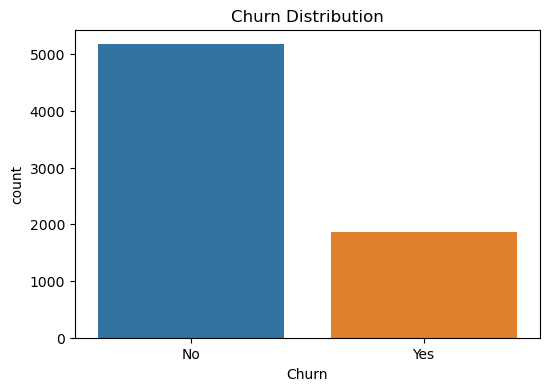

In [289]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn')
plt.title('Churn Distribution')
plt.show()

From the visualisation, we can see that the likelihood for a person to not churn is higher compared to churning.

Cleaning my data

In [ ]:
numeric_data= data.select_dtypes(include=['int64','float64'])
categorical_data=data.select_dtypes(exclude=['int64','float64'])

numeric_data.info()
categorical_data.info()

In [ ]:
numeric_data1 = numeric_data.dropna(axis=1, how='all')

numeric_data1.info()

categorical_data1 = categorical_data.dropna(axis=1, how='all')

categorical_data1.info()

In [ ]:
N_thresh = 0.3*len(numeric_data1)
N_thresh

C_thresh = 0.3*len(categorical_data1)
C_thresh

numeric_data2 =numeric_data1.dropna(thresh = N_thresh, axis =1)
categorical_data2 = categorical_data1.dropna(thresh =C_thresh, axis =1)

numeric_data2.info()
categorical_data2.info()

Encoding my categorical variables

In [ ]:
column_names = list(categorical_data.columns.values)

for column in column_names:
  categorical_data2[column], _ = pd.factorize(categorical_data2[column])

categorical_data2

Combining my categorical variables with the numeric variables

In [186]:
combined_data = pd.concat([numeric_data2, categorical_data2], axis=1)

combined_data = combined_data.drop('customerID', axis=1)

combined_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,0,2,53.85,108.15,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,0,45,42.30,1840.75,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,2,70.70,151.65,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0
7039,0,72,103.20,7362.90,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0
7040,0,11,29.60,346.45,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
combined_data = pd.DataFrame(imputer.fit_transform(combined_data), columns = combined_data.columns)
combined_data.info(verbose=True)
from sklearn.feature_selection import SelectKBest, chi2

Selecting the target variable

In [188]:
Y = combined_data['Churn']

X = combined_data.drop('Churn', axis=1)

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,1.0,29.85,29.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,34.0,56.95,1889.50,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,2.0,53.85,108.15,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
4,0.0,2.0,70.70,151.65,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using my ten best features from the model

In [189]:
# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Select the top 10 features with the highest information gain
selector = SelectKBest(score_func=chi2, k=10)

# Fit the selector to the encoded features and target variable
selector.fit(X_encoded, Y)

# Get the mask of selected features
selected_feature_mask = selector.get_support()

# Get the names of the selected features
selected_features = X_encoded.columns[selected_feature_mask]

selected_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

Adapting my X variable to contain only my 10 best features

In [193]:
X = combined_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']]

X

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1.0,29.85,29.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0,56.95,1889.50,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,2.0,53.85,108.15,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,45.0,42.30,1840.75,1.0,1.0,1.0,0.0,0.0,1.0,2.0
4,2.0,70.70,151.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,24.0,84.80,1990.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7039,72.0,103.20,7362.90,0.0,1.0,0.0,1.0,1.0,1.0,3.0
7040,11.0,29.60,346.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,4.0,74.40,306.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Subsetting my continious variables so I can scale them

In [194]:
x = combined_data[['tenure', 'MonthlyCharges','TotalCharges']]
x

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7038,24.0,84.80,1990.50
7039,72.0,103.20,7362.90
7040,11.0,29.60,346.45
7041,4.0,74.40,306.60


Scaling

In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled


# Assuming 'X_scaled' is your scaled NumPy array and 'X' is your original DataFrame
x = pd.DataFrame(x_scaled, columns=x.columns)
x

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


Combining my scaled variables with the non-scaled 

In [196]:
X = X.drop(['tenure', 'MonthlyCharges','TotalCharges'], axis=1)
X= pd.concat([x, X], axis=1)
X

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,-1.277445,-1.160323,-0.992611,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.066327,-0.259629,-0.172165,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,-1.236724,-0.362660,-0.958066,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.514251,-0.746535,-0.193672,1.0,1.0,1.0,0.0,0.0,1.0,2.0
4,-1.236724,0.197365,-0.938874,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.127605,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7039,1.613701,1.277533,2.242606,0.0,1.0,0.0,1.0,1.0,1.0,3.0
7040,-0.870241,-1.168632,-0.852932,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,-1.155283,0.320338,-0.870513,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# EXPLORATORY DATA ANALYSIS

**2. Use your EDA(Exploratory Data Analysis) skills to find out which customer profiles relate to churning a lot.**

In [286]:
selected_columns = list(X.columns.values)
selected_columns
# Create the DataFrame 'X' with the selected columns
X = combined_data[selected_columns]



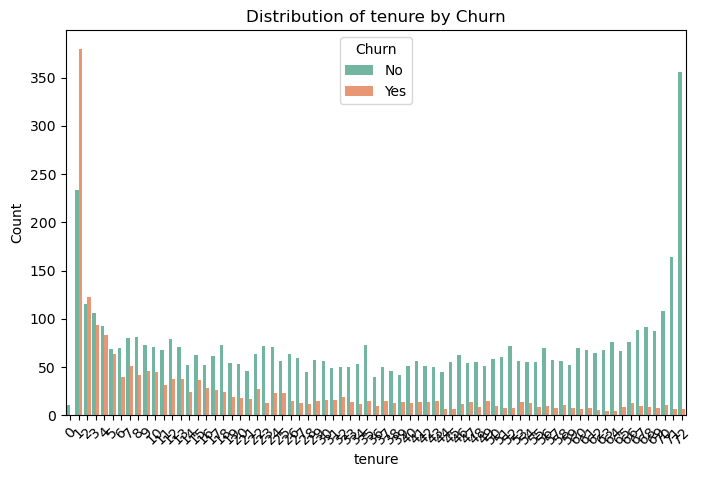

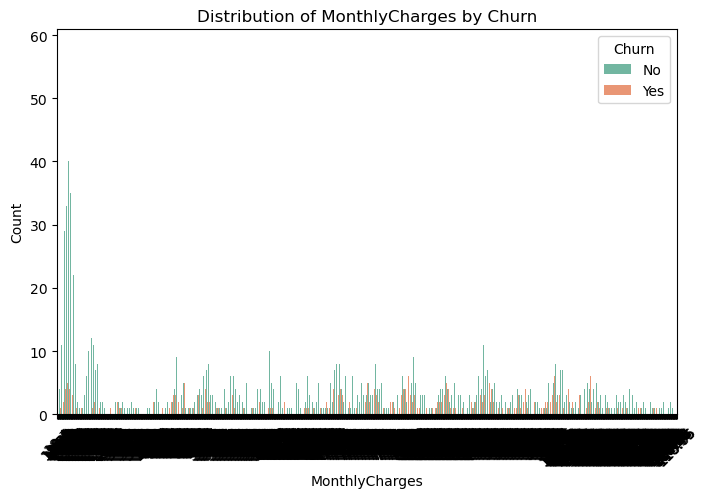

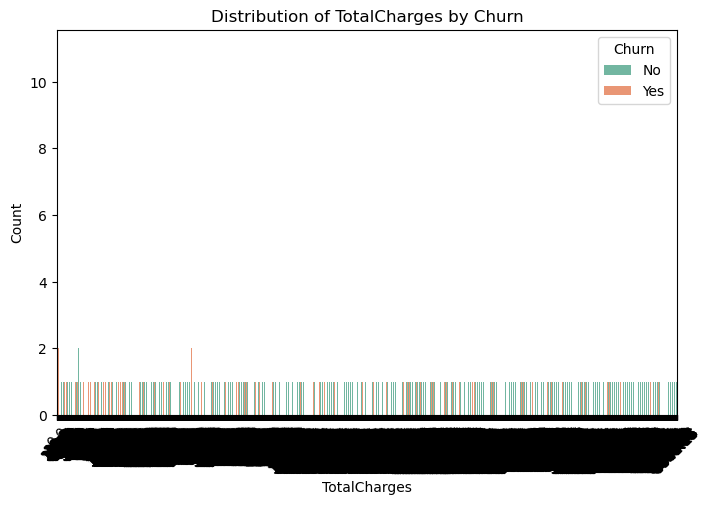

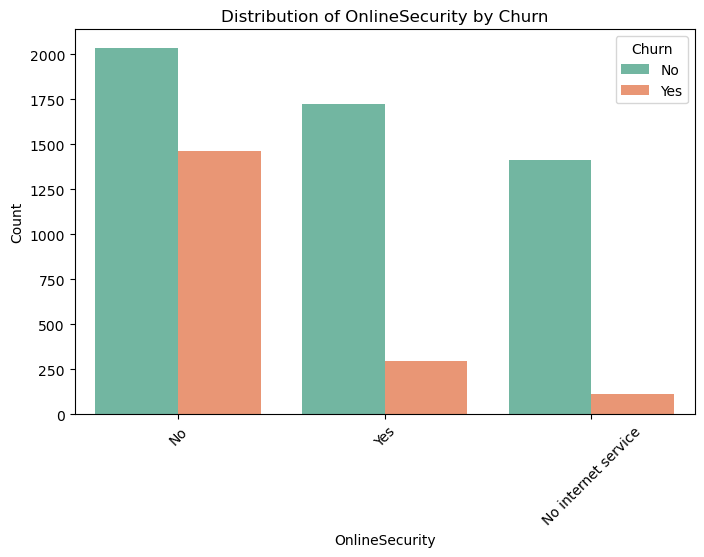

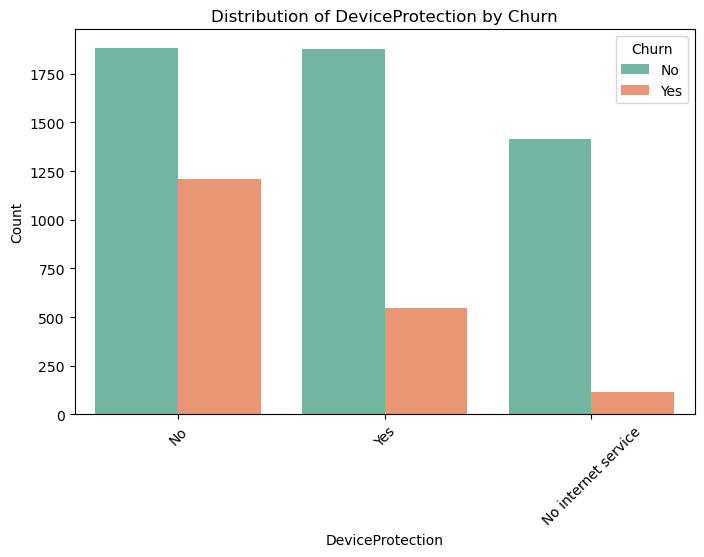

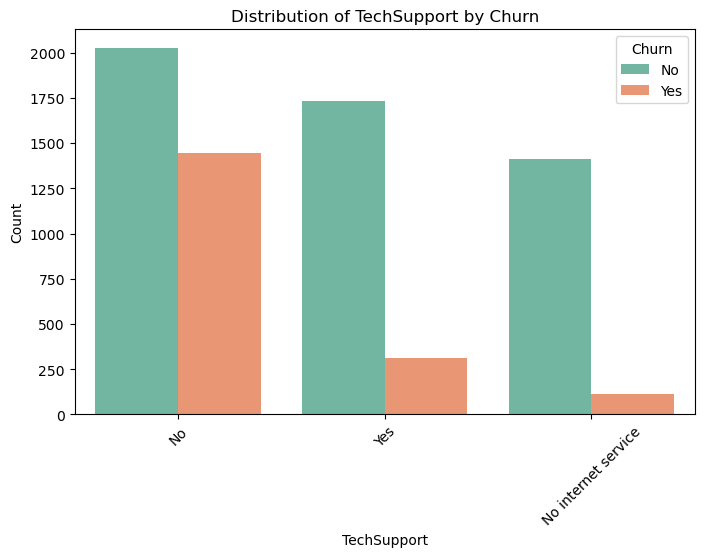

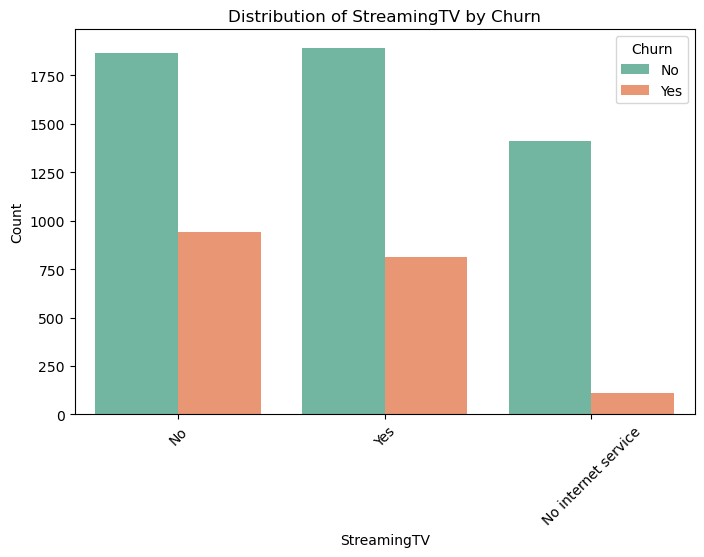

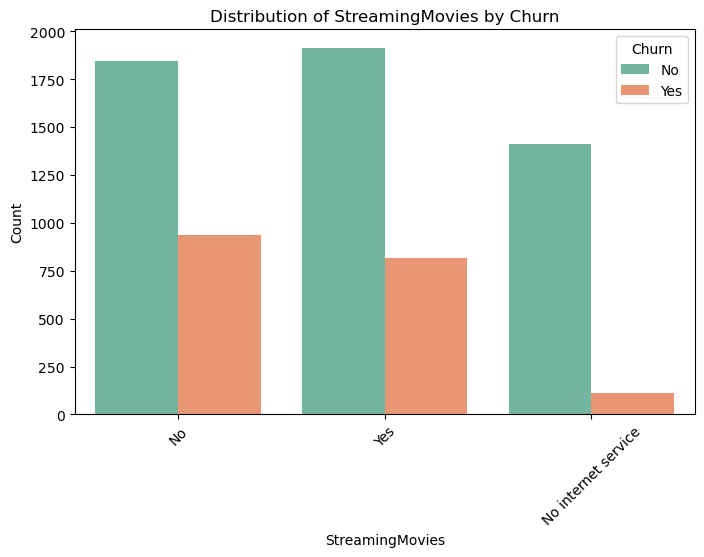

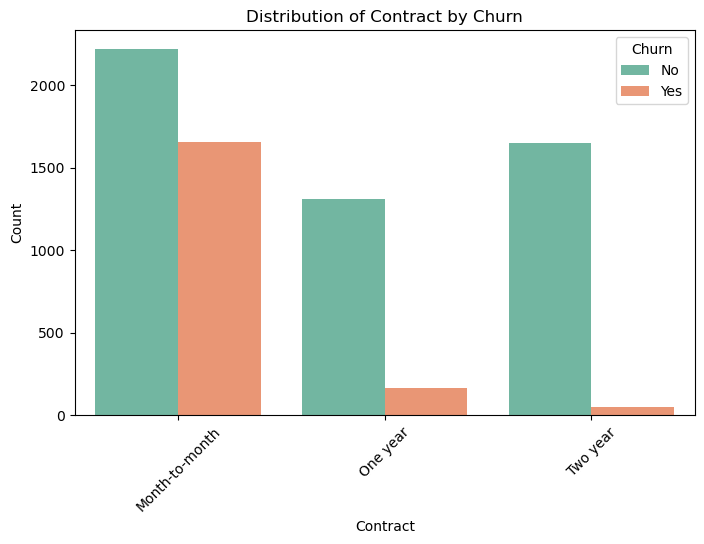

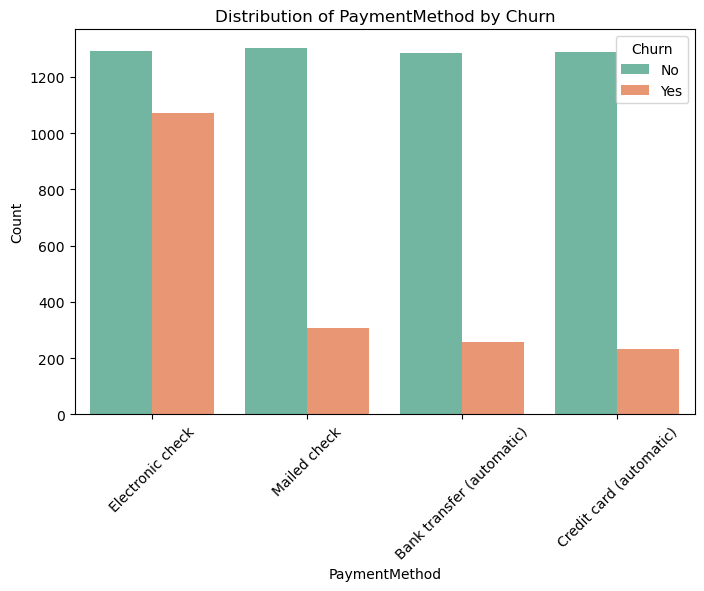

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of feature columns (excluding 'Churn')
feature_columns = list(X.columns.values)

# Iterate through each feature column and plot the distribution
for feature_column in feature_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature_column, data=data, hue='Churn', palette='Set2')
    plt.title(f'Distribution of {feature_column} by Churn')
    plt.xlabel(f'{feature_column}')
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])

    # Set x-axis labels to display the distinct values of the feature
    plt.xticks(rotation=45)

    plt.show()


# TRAINING AND ACCURACY

**3. Using the features in (1) define and train a Multi-Layer Perceptron model using the Functional API**

In [197]:
combined_data['TotalCharges'] = combined_data['TotalCharges'].replace(' ', np.nan)
combined_data['TotalCharges'] = combined_data['TotalCharges'].astype(float)


Splitting my dataset

In [198]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Splitting the data into training (80%), validation (10%), and testing (10%)
X_train, X_temp, Y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [199]:
import tensorflow
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, roc_auc_score


Keras Functional API model

In [200]:
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

In [203]:
_, accuracy = model.evaluate(X_train, Y_train)
accuracy*100

177/177 [==============================] - 0s 292us/step - loss: 0.4156 - accuracy: 0.8019


80.19169569015503

In [92]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

23/23 [==============================] - 0s 329us/step - loss: 0.3863 - accuracy: 0.8213
Test Loss: 0.3863
Test Accuracy: 82.1277


In [204]:
y_pred = model.predict(X_test)

output = (y_pred >0.5).astype(int)

23/23 [==============================] - 0s 324us/step


Choosing an appropriate threshold

In [205]:
threshold = 0.5  
y_pred_binary = [1 if val >= threshold else 0 for val in y_pred]


In [206]:
accuracy = accuracy_score(Y_test, y_pred_binary)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 81.56%


In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate AUC score
auc_score = roc_auc_score(Y_test, y_pred_binary)

# Display the AUC score
print(f'AUC Score: {auc_score * 100:.2f}%')


# Optimization AND ACCURACY

In [ ]:
!pip install keras-tuner

In [217]:
import keras_tuner
from tensorflow import keras

In [253]:
def build_model(hp):
    input_layer = keras.layers.Input(shape=(X_train.shape[1],))
    x = input_layer

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        units = hp.Int(f'units_{i}', min_value=32, max_value=96, step=32)
        activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh'])
        x = keras.layers.Dense(units=units, activation=activation)(x)
        # Add dropout layer after each dense layer
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        x = keras.layers.Dropout(dropout_rate)(x)

    output_layer = keras.layers.Dense(1, activation='sigmoid')(x)

    # Tune the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model = keras.Model(inputs=input_layer, outputs=output_layer)

    model.compile(
        optimizer=keras.optimizers.legacy.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [254]:
build_model(keras_tuner.HyperParameters())

In [255]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=100,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

Reloading Tuner from tuning_dir/samples/tuner0.json


In [256]:
tuner.search(X_train, Y_train, epochs=30 ,validation_data=(X_test, Y_test))

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.results_summary()

In [ ]:
best_model = tuner.get_best_models(num_models=2)[0]

best_model.summary()

In [260]:
test_accuracy = best_model.evaluate(X_test, Y_test)[1]
print(f"Test Accuracy: {test_accuracy*100:.4f}")

23/23 [==============================] - 0s 432us/step - loss: 0.4298 - accuracy: 0.7901
Test Accuracy: 79.0071


In [261]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_binary)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Calculate AUC score
auc_score = roc_auc_score(Y_test, y_pred_prob)
print(f'AUC Score: {auc_score * 100:.2f}%')

23/23 [==============================] - 0s 371us/step
Test Accuracy: 81.56%
AUC Score: 87.23%


Saving the model

In [262]:
best_model.save("best_model.pkl")

INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


In [263]:


import joblib


# Save the model
joblib.dump(model, 'best_model.joblib')

# # Load the model
# loaded_model = joblib.load('best_model.joblib')

# from joblib import dump, load
# with open('finalmodel.joblib','wb') as f:
#   dump(model,f)

['best_model.joblib']

# Testing the model

In [285]:
from keras.models import load_model

# Load the model
loaded_model = load_model("best_model.pkl")


In [265]:
tenure = 12
monthly_charges = 60.0
total_charges = 720.0
online_security = "Yes"  
device_protection = "No"  
tech_support = "Yes"  
streaming_tv = "No" 
streaming_movies = "Yes"  
contract = "Two Year"  
payment_method = "Electronic Check"  

# Create a DataFrame with the input data
input_data = {
    'tenure': [tenure],
    'MonthlyCharges': [monthly_charges],
    'TotalCharges': [total_charges],
    'OnlineSecurity': [online_security],
    'DeviceProtection': [device_protection],
    'TechSupport': [tech_support],
    'StreamingTV': [streaming_tv],
    'StreamingMovies': [streaming_movies],
    'Contract': [contract],
    'PaymentMethod': [payment_method]
}


In [266]:
input_df = pd.DataFrame(input_data)

In [235]:
input_df

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,12,60.0,720.0,Yes,No,Yes,No,Yes,Two Year,Electronic Check


In [ ]:
predictions = loaded_model.predict(input_df)

In [ ]:
if predictions[0] == 1:
    print("This customer is likely to churn.")
else:
    print("This customer is not likely to churn.")

In [284]:
input_df

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,12,60.0,720.0,Yes,No,Yes,No,Yes,Two Year,Electronic Check


In [ ]:
num_data= input_df.select_dtypes(include=['int64','float64'])
cat_data=input_df.select_dtypes(exclude=['int64','float64'])

num_data.info()
cat_data.info()

In [241]:
names = list(cat_data.columns.values)

for column in names:
  cat_data[column], _ = pd.factorize(cat_data[column])

cat_data

,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,0,0,0,0,0,0,0


In [278]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_scale = scale.fit_transform(num_data)

x_scale


# Assuming 'X_scaled' is your scaled NumPy array and 'X' is your original DataFrame
num_data = pd.DataFrame(x_scale, columns=num_data.columns)
num_data

,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0


In [279]:
data2 = pd.concat([num_data, cat_data], axis=1)
data2

,tenure,MonthlyCharges,TotalCharges,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [280]:
predictions = loaded_model.predict(data2)

1/1 [==============================] - 0s 11ms/step


In [281]:
predictions[0][0]

0.27001286

In [283]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scale, f)

# Reference

I have mde used of the following sources to guide me in this Assignment.
-Student presentation sample code
-ChatGPT